In [2]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/gimli/projects/igre


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

In [22]:
SRC="/Users/gimli/Qsync/datasets/Gent-Altairpiece/lamb/LamGods_Adoration_Lamb.ims"
out_name = "lamb"
# SRC="/Users/gimli/Qsync/datasets/Gent-Altairpiece/lamb/LamGods_Adoration_Dove.ims"
# out_name = "dove"
# SRC="/Users/gimli/Qsync/datasets/Gent-Altairpiece/lamb/LamGods_Hermits_Maidens.ims"
# out_name = "maidens"

In [23]:
def cvtData(line):
    data = line.strip().split(" ")
    while '' in data:
        data.remove('')
    return data

with open(SRC, "rt", encoding="latin1") as imsfile:
    line = imsfile.readline()
    version = cvtData(line)[0]
    
    line = imsfile.readline()
    [width, height, depth] = cvtData(line)
    width = int(width)
    height = int(height)
    depth = int(depth)
    
    print("expected dimensions:", width, height, depth)
    
    matrix = np.zeros((int(width), int(height), int(depth)))

    all_data = []
    line = imsfile.readline()
    while line:
        all_data.extend(cvtData(line))
        try:
            line = imsfile.readline()
        except Exception as e:
            print(e)
            print(line)

expected dimensions: 134 126 227


In [24]:
imgs = np.asarray(all_data[:(depth * height * width)]).reshape(depth, height, width).astype(float)

In [25]:
channels = all_data[depth * height * width:]

In [26]:
#lamb = imgs[[1, 2, 22, 23, 45, 46, 67, 68, 89, 90, 111, 112, 133, 134, 155, 156, 177, 178],:,:].astype(float);

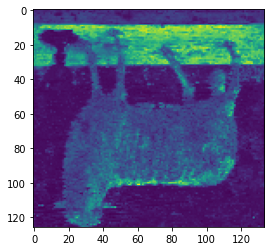

In [27]:
plt.imshow(imgs[1,:,:])

In [28]:
with open(f"/Users/gimli/Downloads/{out_name}.mat", "wb") as file:
    savemat(file, {
        out_name: imgs,
        "channels": channels
    })